# Plant Classification Using Spectral Data

In [1]:
!wget https://github.com/p-p-p-p/Spectral-Data-Analysis/raw/refs/heads/main/spectral_data.csv
!wget https://github.com/p-p-p-p/Spectral-Data-Analysis/raw/refs/heads/main/plant_classification_model.pkl

--2024-11-28 11:32:50--  https://github.com/p-p-p-p/Spectral-Data-Analysis/raw/refs/heads/main/spectral_data.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/p-p-p-p/Spectral-Data-Analysis/refs/heads/main/spectral_data.csv [following]
--2024-11-28 11:32:50--  https://raw.githubusercontent.com/p-p-p-p/Spectral-Data-Analysis/refs/heads/main/spectral_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7920826 (7.6M) [text/plain]
Saving to: ‘spectral_data.csv’

spectral_data.csv   100%[===================>]   7.55M  --.-KB/s    in 0.1s    

2024-11-28 11:32:51 (68.8 MB/s) - ‘spectral_data.cs

## Data Loading and Preprocessing
#### Goal:
Load the spectral data, shuffle it for randomness, and split it into features (X) and target (y). The features represent spectral reflections (wavelengths), while the target corresponds to plant classification labels.

In [2]:
import pandas as pd

# Load and prepare the dataset
df = pd.read_csv('spectral_data.csv')

# Shuffle the dataset for randomness
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# Separate features (X) and target (y)
X = df.iloc[:, :-2]  # All columns except the last two are features
y = df['fruit_name']  # Target variable (plant type)

# Display basic information about the dataset
print("\nFeature Shape:", X.shape)
print("Target Shape:", y.shape)
print("Dataset Head:")
df.head()


Feature Shape: (624, 2151)
Target Shape: (624,)
Dataset Head:


,0,1,2,3,4,5,6,7,8,9,...,2143,2144,2145,2146,2147,2148,2149,2150,fruit_name,is_fresh
0,0.140,0.134,0.129,0.133,0.130,0.119,0.110,0.103,0.101,0.104,...,0.235,0.231,0.231,0.231,0.229,0.226,0.224,0.226,vineyard,0
1,0.239,0.240,0.232,0.231,0.235,0.236,0.224,0.216,0.216,0.219,...,0.272,0.267,0.261,0.259,0.259,0.262,0.269,0.272,vineyard,0
2,0.260,0.264,0.263,0.251,0.243,0.241,0.232,0.232,0.233,0.231,...,0.314,0.317,0.310,0.311,0.318,0.317,0.326,0.331,olive,0
3,0.219,0.215,0.210,0.202,0.199,0.199,0.190,0.185,0.178,0.167,...,0.297,0.292,0.286,0.285,0.288,0.292,0.291,0.295,olive,0
4,0.225,0.233,0.244,0.219,0.202,0.214,0.234,0.216,0.186,0.172,...,0.335,0.335,0.337,0.338,0.335,0.336,0.339,0.334,vineyard,0


In [3]:
fruit_counts = df.groupby(['fruit_name', 'is_fresh']).size().unstack(fill_value=0)
# Display the count for each fruit, separately for dry (0) and fresh (1)
for fruit in fruit_counts.index:
    dry_count = fruit_counts.loc[fruit, 0]
    fresh_count = fruit_counts.loc[fruit, 1]
    print(f"Number of dry {fruit}: {dry_count}")
    print(f"Number of fresh {fruit}: {fresh_count}")

Number of dry avocado: 104
Number of fresh avocado: 104
Number of dry olive: 104
Number of fresh olive: 104
Number of dry vineyard: 104
Number of fresh vineyard: 104


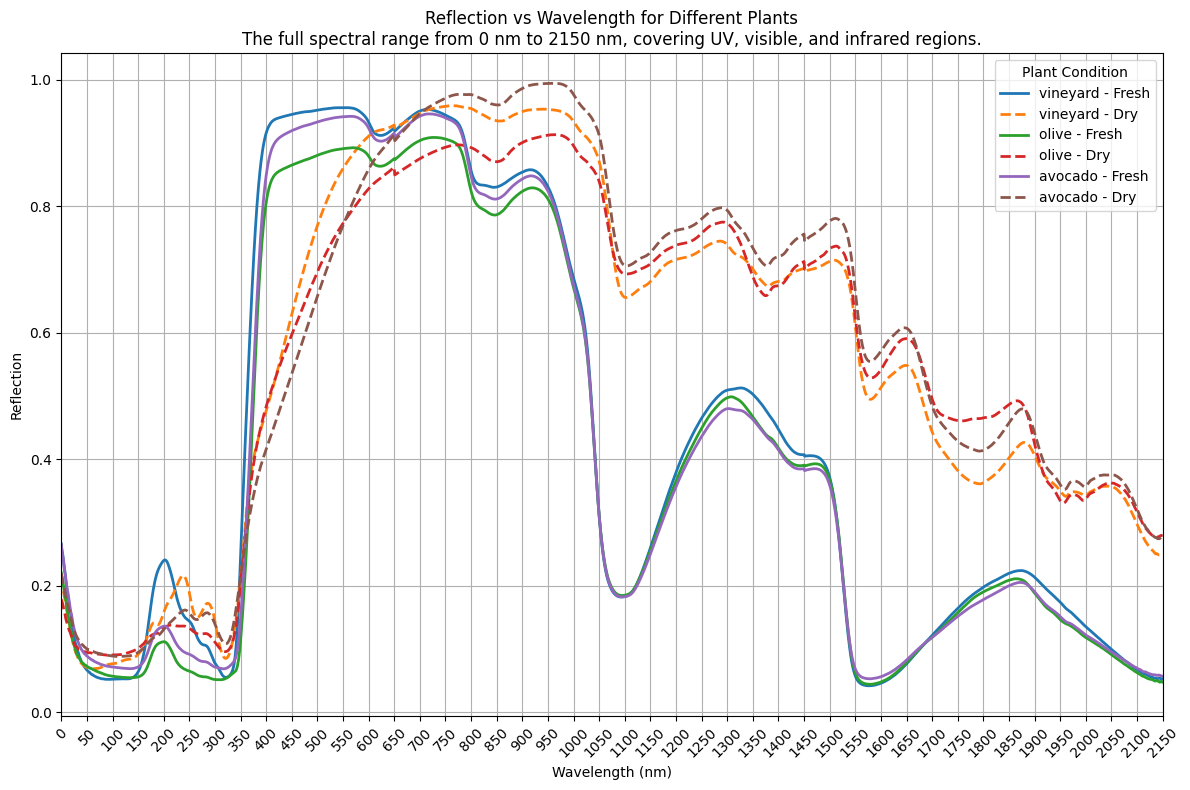

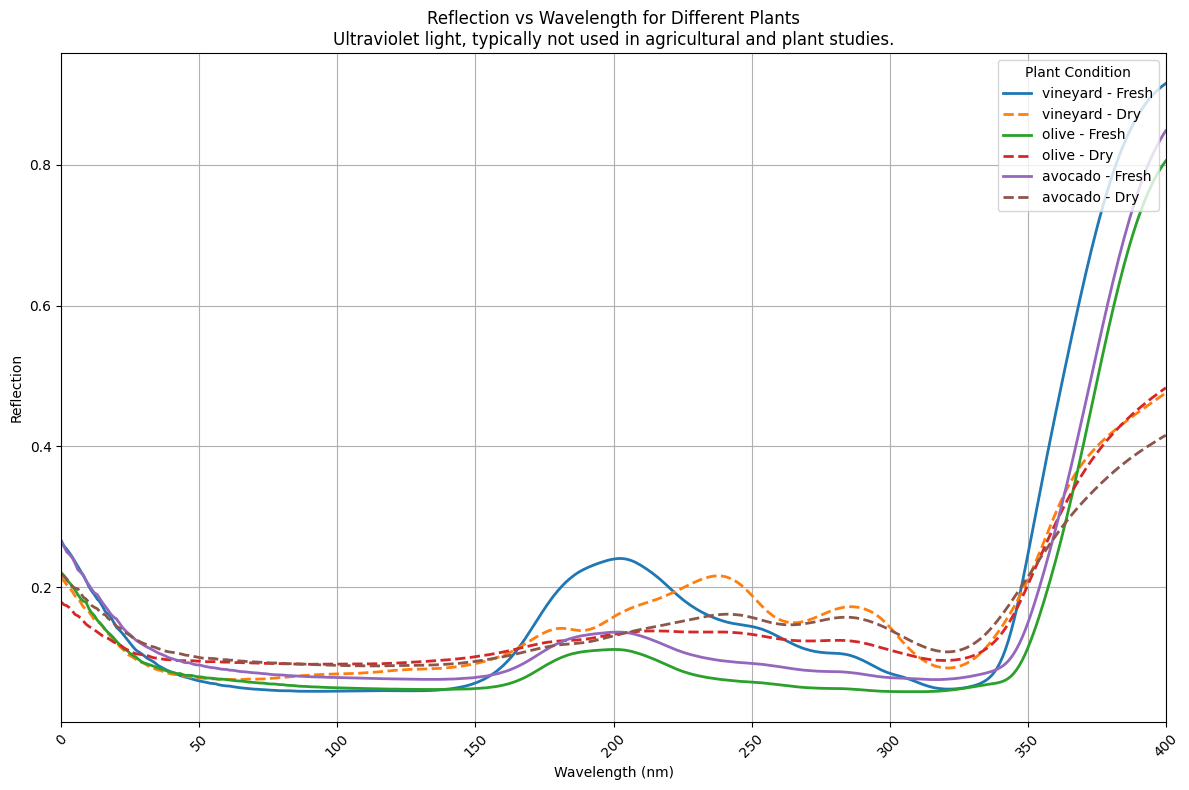

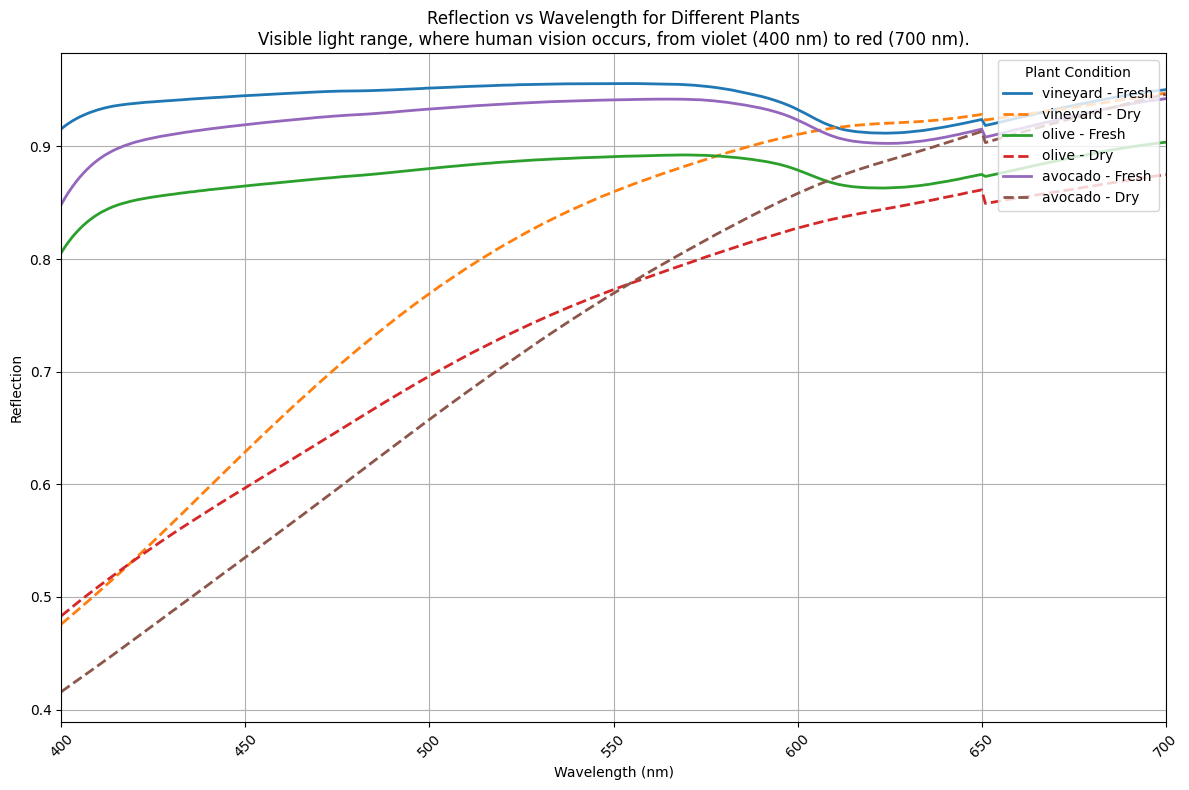

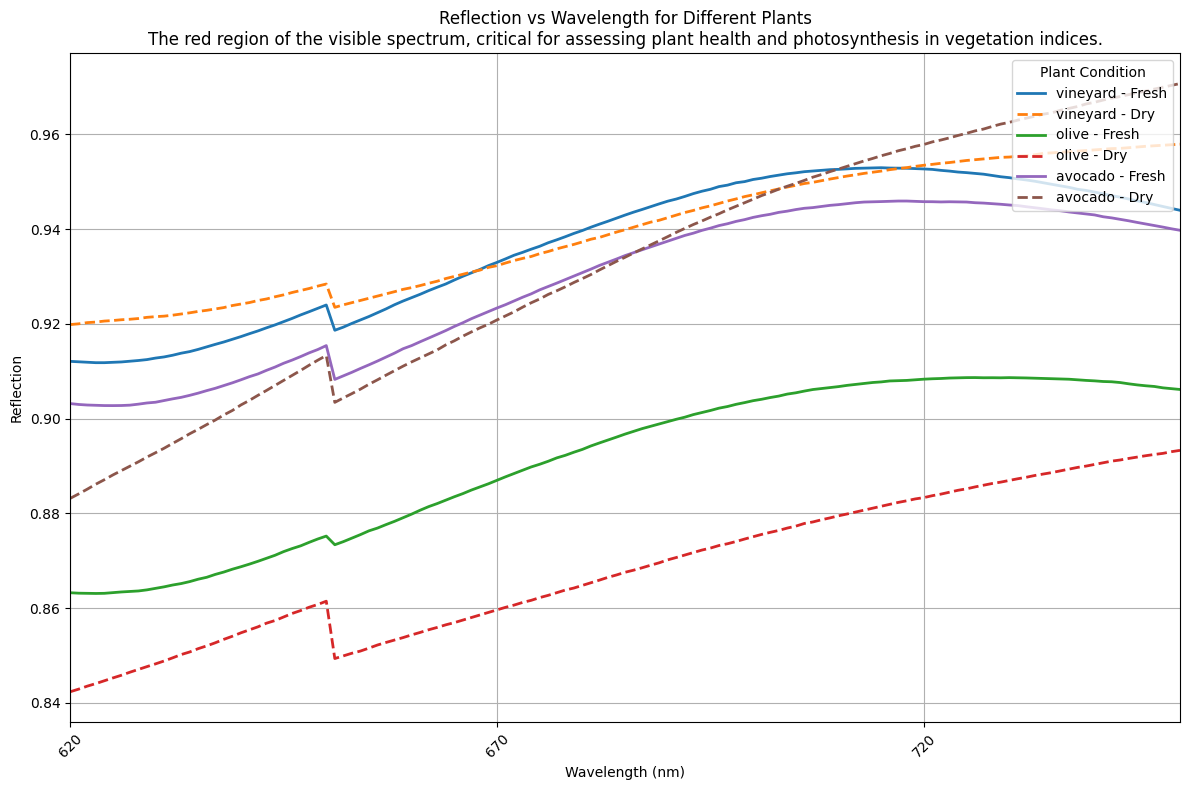

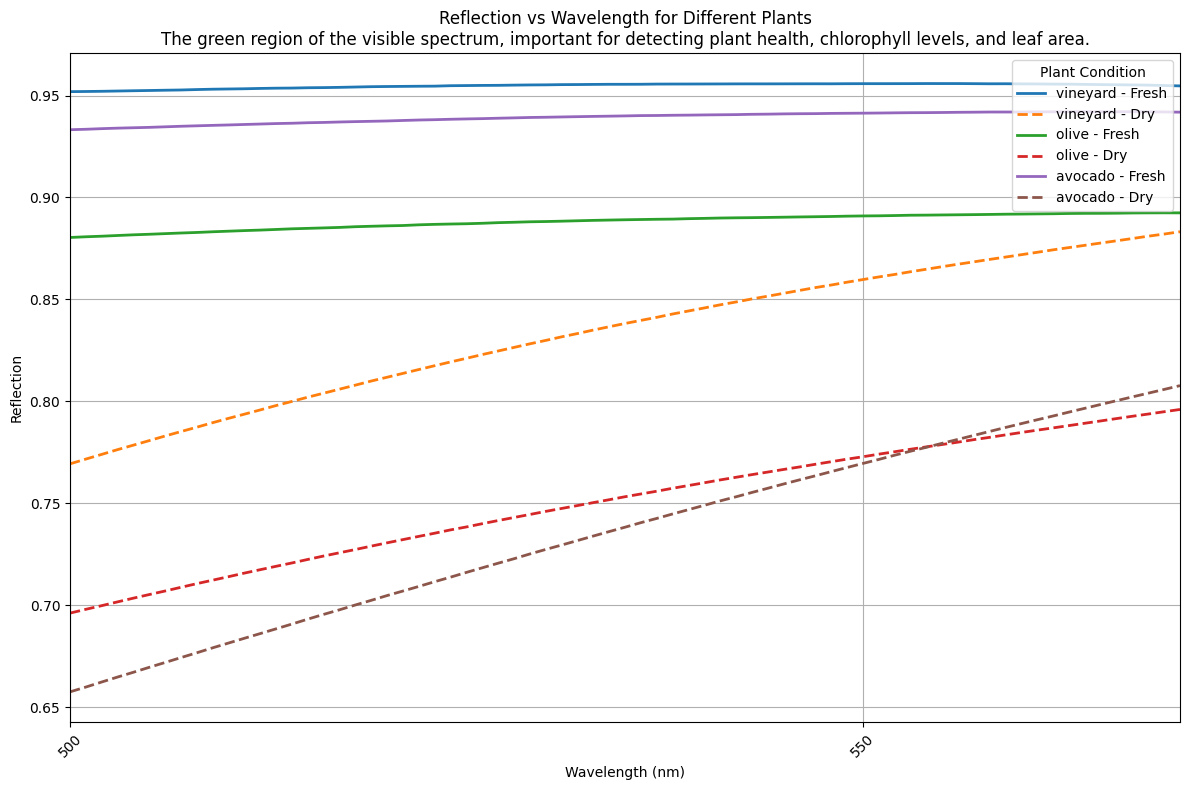

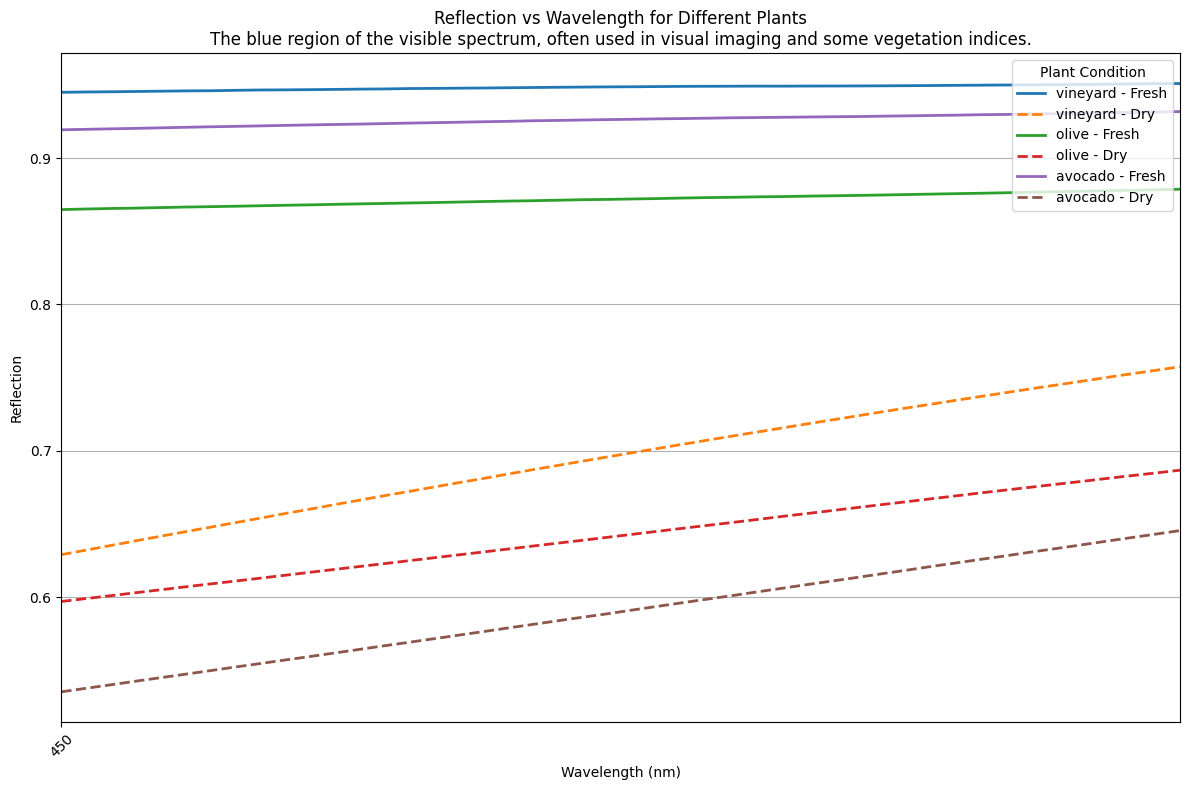

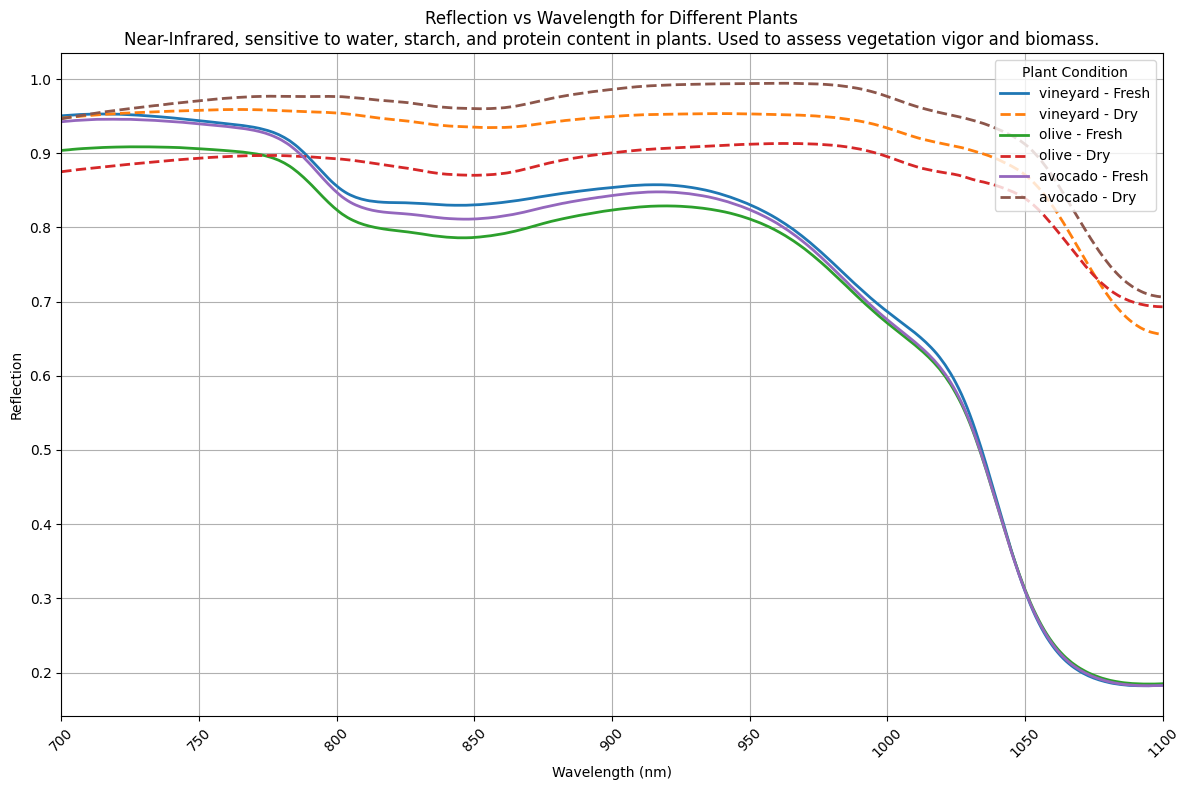

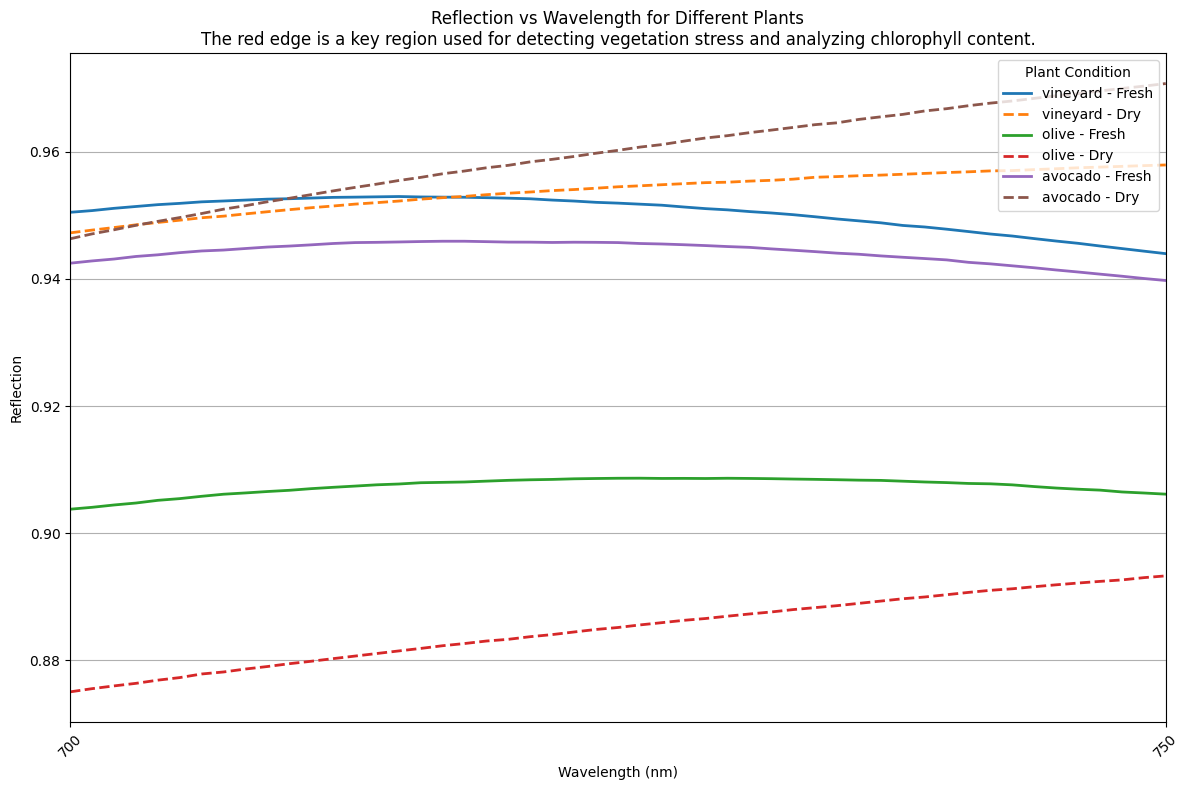

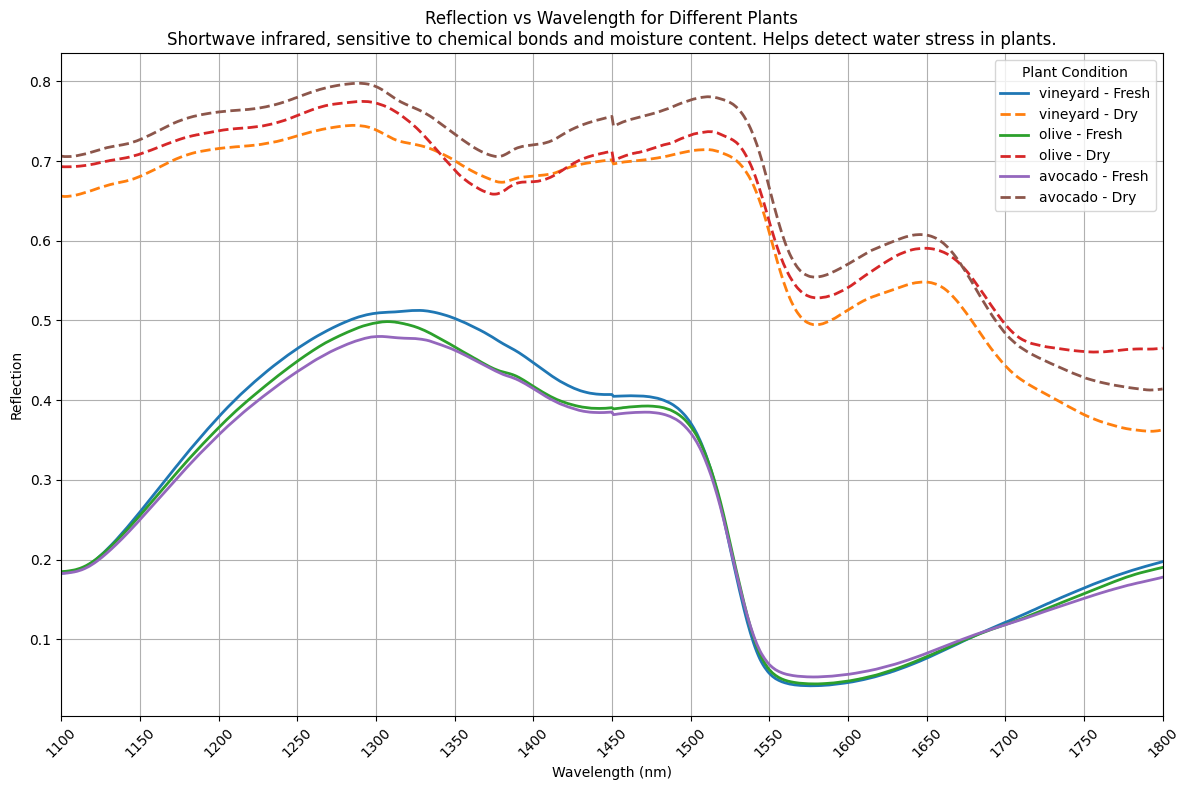

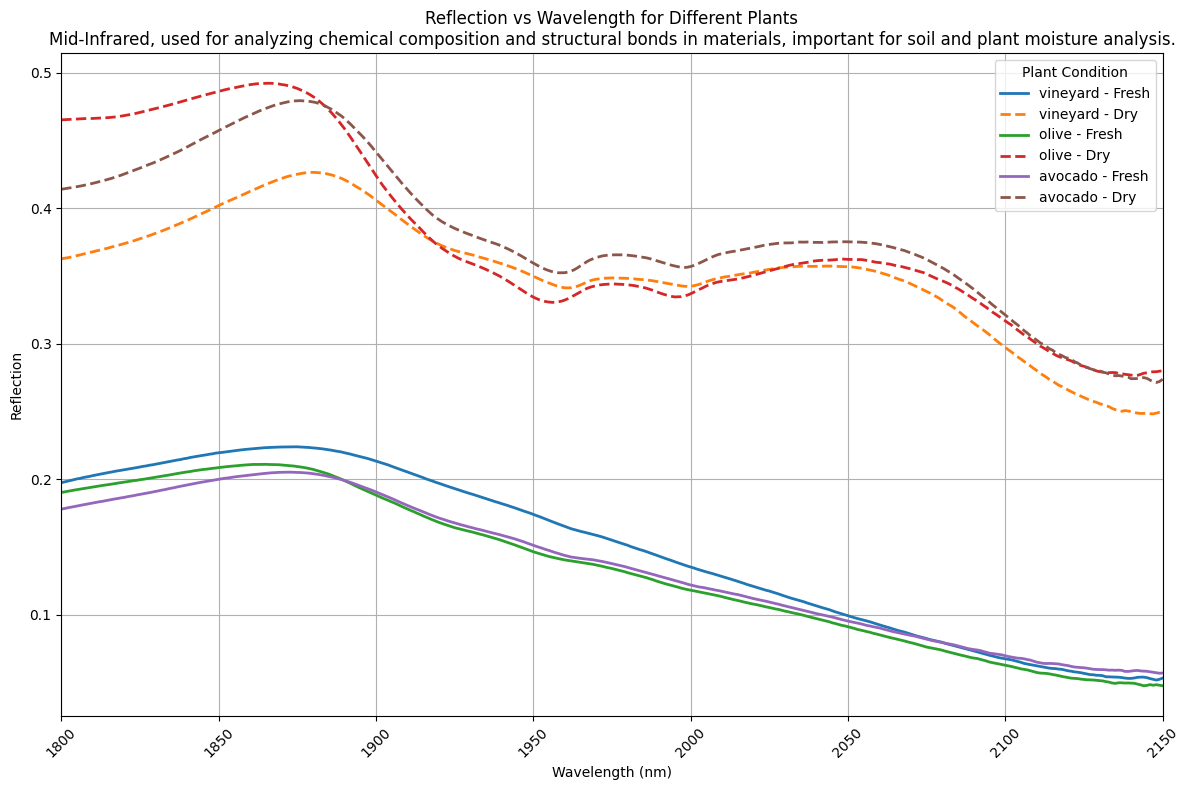

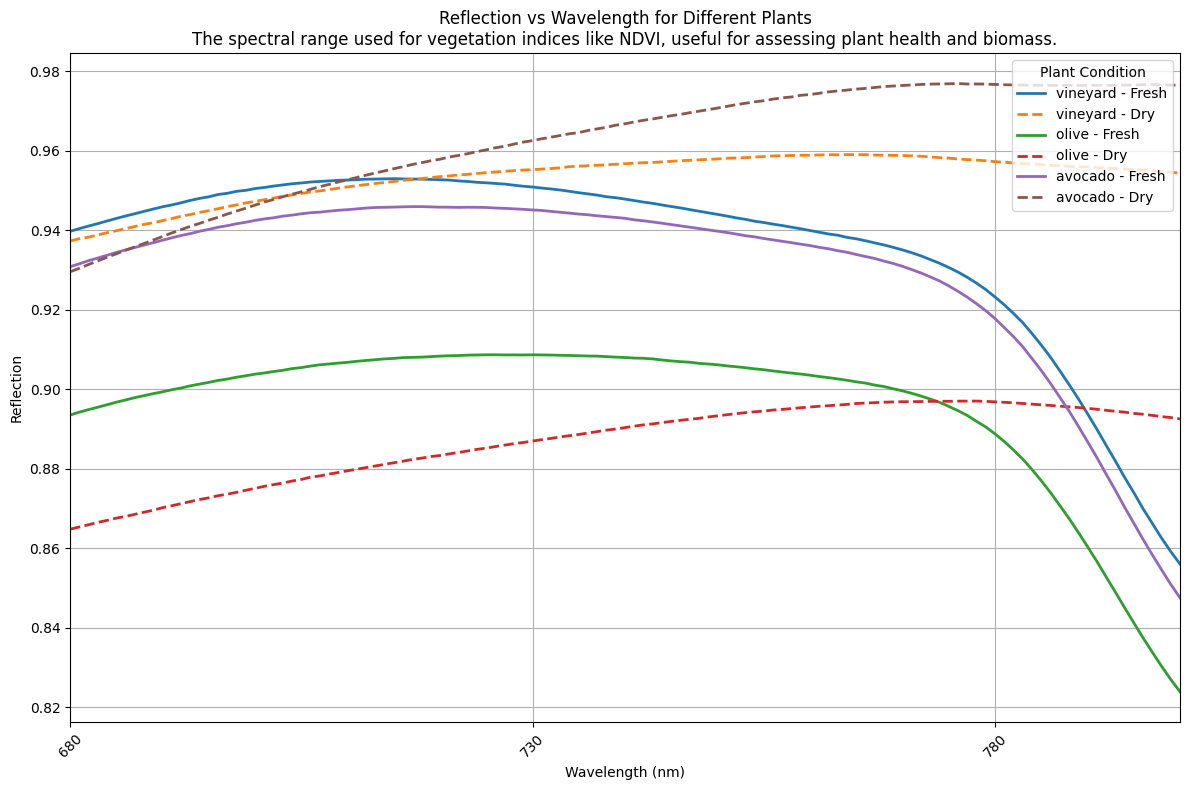

In [4]:
#@title Reflection vs. wavelength for different plants in different wavelength ranges.
import matplotlib.pyplot as plt
# Function to plot reflection vs wavelength for fresh and dry samples based on a given wavelength range for different plants
def plot_spectral_data_by_range(df, wavelength_range_key):
    # Get the wavelength range from the dictionary based on the key provided
    range_info = wavelength_ranges[wavelength_range_key]
    wavelength_start = range_info["start"]
    wavelength_end = range_info["end"]

    # Description for the plot title
    description = range_info["description"]

    # Assuming the first columns correspond to wavelengths, and the last two columns are 'fruit_name' and 'is_fresh'
    wavelength_columns = df.columns[:-2]  # Exclude 'fruit_name' and 'is_fresh'

    # Directly slice the columns from 'wavelength_start' to 'wavelength_end'
    valid_columns = wavelength_columns[wavelength_start:wavelength_end + 1]

    # Slice the dataframe to match the desired range of wavelengths
    df_wavelength_range = df.loc[:, valid_columns]

    # Create a figure for plotting
    plt.figure(figsize=(12, 8))

    # Loop through each unique fruit name
    for fruit in df['fruit_name'].unique():
        # Filter the data for the current fruit
        fruit_data = df[df['fruit_name'] == fruit]

        # Separate fresh and dry samples for the current fruit
        fresh_data = fruit_data[fruit_data['is_fresh'] == 1]  # Fresh samples
        dry_data = fruit_data[fruit_data['is_fresh'] == 0]    # Dry samples

        # Calculate the average reflection for fresh and dry samples
        fresh_reflection = fresh_data[valid_columns].mean(axis=0)
        dry_reflection = dry_data[valid_columns].mean(axis=0)

        # Plot reflection vs wavelength for fresh and dry samples for the current fruit
        plt.plot(valid_columns, fresh_reflection, label=f"{fruit} - Fresh", linestyle='-', linewidth=2)
        plt.plot(valid_columns, dry_reflection, label=f"{fruit} - Dry", linestyle='--', linewidth=2)

    # Add titles and labels
    # plt.title(f"Reflection vs Wavelength for Different Plants ({wavelength_range_key})\n Range: {wavelength_start}nm - {wavelength_end}nm\n{description}")
    plt.title(f"Reflection vs Wavelength for Different Plants\n{description}")
    plt.xlabel("Wavelength (nm)")
    plt.ylabel("Reflection")

    # Set the x-axis limits to match the wavelength range of interest
    plt.xlim(valid_columns[0], valid_columns[-1])

    # Skip every 50th point for better readability
    step = 50  # Skip every 50th point
    x_ticks = valid_columns[::step]  # Select every 50th wavelength
    plt.xticks(x_ticks, rotation=45)  # Set the x-ticks with the selected wavelengths

    # Add grid and ensure everything fits
    plt.grid(True)
    plt.tight_layout()

    # Add legend
    plt.legend(title="Plant Condition", loc='upper right')

    # Show the plot
    plt.show()


# Wavelength ranges dictionary
wavelength_ranges = {
    "All Spectral Data": {
        "start": 0,
        "end": 2150,
        "description": "The full spectral range from 0 nm to 2150 nm, covering UV, visible, and infrared regions."
    },
    "UV (Ultraviolet)": {
        "start": 0,
        "end": 400,
        "description": "Ultraviolet light, typically not used in agricultural and plant studies."
    },
    "Visible Light": {
        "start": 400,
        "end": 700,
        "description": "Visible light range, where human vision occurs, from violet (400 nm) to red (700 nm)."
    },
    "Red": {
        "start": 620,
        "end": 750,
        "description": "The red region of the visible spectrum, critical for assessing plant health and photosynthesis in vegetation indices."
    },
    "Green": {
        "start": 500,
        "end": 570,
        "description": "The green region of the visible spectrum, important for detecting plant health, chlorophyll levels, and leaf area."
    },
    "Blue": {
        "start": 450,
        "end": 495,
        "description": "The blue region of the visible spectrum, often used in visual imaging and some vegetation indices."
    },
    "Near-Infrared (NIR)": {
        "start": 700,
        "end": 1100,
        "description": "Near-Infrared, sensitive to water, starch, and protein content in plants. Used to assess vegetation vigor and biomass."
    },
    "Red Edge": {
        "start": 700,
        "end": 750,
        "description": "The red edge is a key region used for detecting vegetation stress and analyzing chlorophyll content."
    },
    "Shortwave Infrared (SWIR)": {
        "start": 1100,
        "end": 1800,
        "description": "Shortwave infrared, sensitive to chemical bonds and moisture content. Helps detect water stress in plants."
    },
    "Mid-Infrared (MIR)": {
        "start": 1800,
        "end": 2150,
        "description": "Mid-Infrared, used for analyzing chemical composition and structural bonds in materials, important for soil and plant moisture analysis."
    },
    "Vegetation Indices (e.g., NDVI)": {
        "start": 680,
        "end": 800,
        "description": "The spectral range used for vegetation indices like NDVI, useful for assessing plant health and biomass."
    }
}
for key in wavelength_ranges:
  plot_spectral_data_by_range(df, key)

## Exploratory Data Analysis (EDA)
#### Goal:
Understand the data distribution, check the number of classes, and visualize separability using Principal Component Analysis (PCA).

#### Explanation:
PCA is used to reduce high-dimensional data into two components for visualization, allowing us to observe class separability.

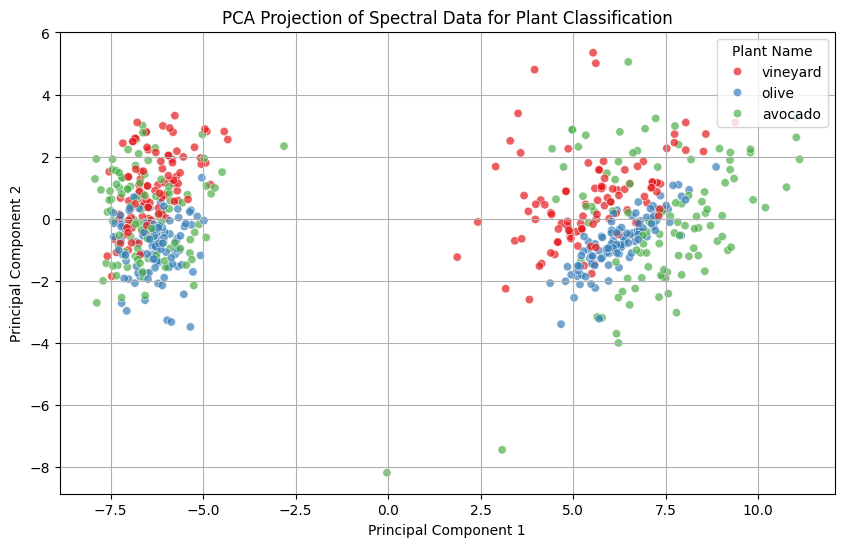

Explained Variance Ratio: [0.91681232 0.04944876]


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize PCA projection
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="Set1", alpha=0.7)
plt.title("PCA Projection of Spectral Data for Plant Classification")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Plant Name", loc="upper right")
plt.grid(True)
plt.show()

# Display explained variance
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")


## Train-Test Split
#### Goal:
Split the data into training and testing sets to evaluate model performance. A typical split is 80% for training and 20% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print dataset sizes
print(f"Training Set Size: {X_train.shape[0]} samples")
print(f"Testing Set Size: {X_test.shape[0]} samples")


Training Set Size: 499 samples
Testing Set Size: 125 samples


## Train model using different algorithms



#### Define Models
Define all models to be compared, including Random Forest, Gradient Boosting, SVM, and Logistic Regression.

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42)
}

# Initialize storage for evaluation metrics
evaluation_results = {}
confusion_matrices = {}
classification_reports = {}


#### Train, Predict, and Evaluate Each Model
For each model, we:

Train the model on the training data.
Make predictions on the test data.
Evaluate accuracy, precision, recall, F1-score, and display a confusion matrix.


Training and Evaluating Random Forest...
Random Forest Accuracy: 0.94

Classification Report:
              precision    recall  f1-score   support

     avocado       0.94      0.87      0.91        39
       olive       0.91      0.98      0.94        43
    vineyard       0.95      0.95      0.95        43

    accuracy                           0.94       125
   macro avg       0.94      0.93      0.93       125
weighted avg       0.94      0.94      0.94       125



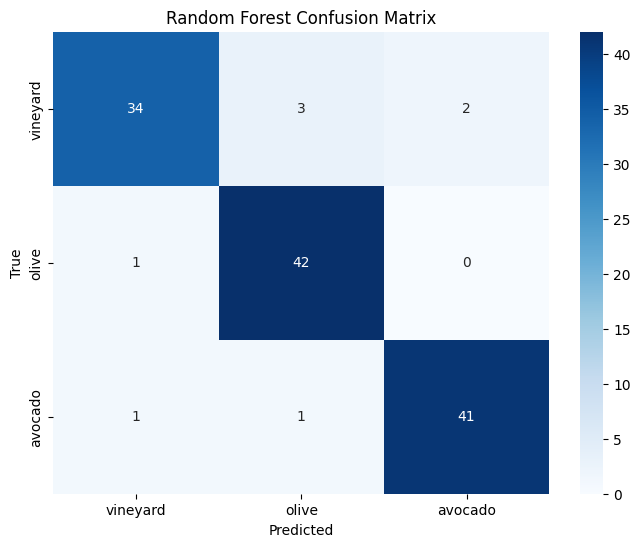


Training and Evaluating Gradient Boosting...
Gradient Boosting Accuracy: 0.93

Classification Report:
              precision    recall  f1-score   support

     avocado       0.92      0.87      0.89        39
       olive       0.95      0.98      0.97        43
    vineyard       0.91      0.93      0.92        43

    accuracy                           0.93       125
   macro avg       0.93      0.93      0.93       125
weighted avg       0.93      0.93      0.93       125



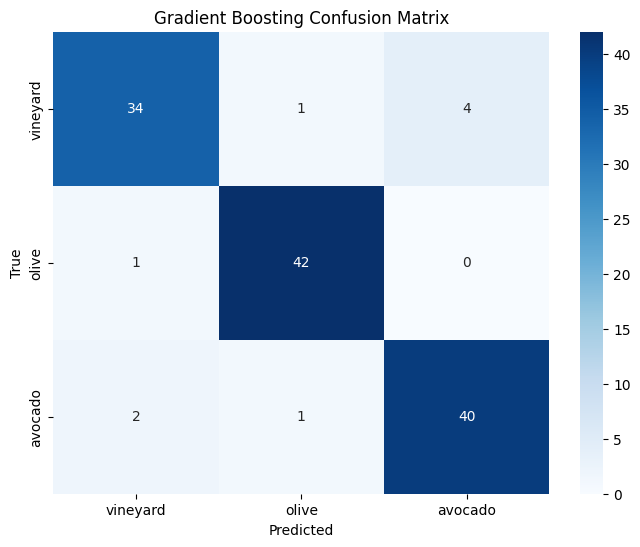


Training and Evaluating SVM...
SVM Accuracy: 0.80

Classification Report:
              precision    recall  f1-score   support

     avocado       0.79      0.56      0.66        39
       olive       0.77      0.93      0.84        43
    vineyard       0.84      0.88      0.86        43

    accuracy                           0.80       125
   macro avg       0.80      0.79      0.79       125
weighted avg       0.80      0.80      0.79       125



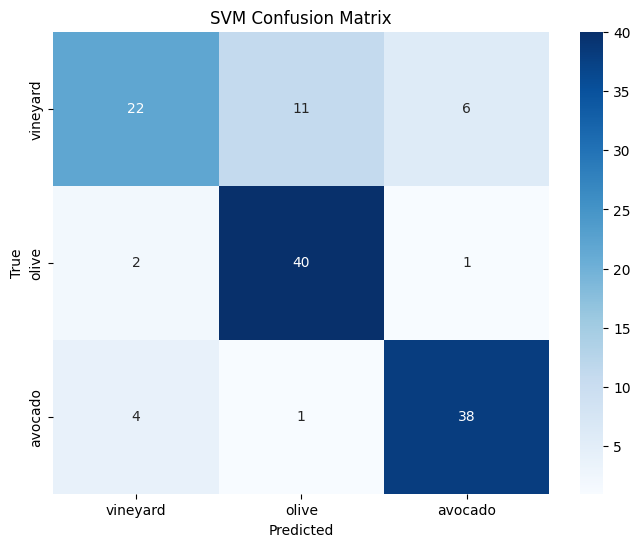


Training and Evaluating Logistic Regression...
Logistic Regression Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

     avocado       0.86      0.82      0.84        39
       olive       0.93      0.95      0.94        43
    vineyard       0.91      0.93      0.92        43

    accuracy                           0.90       125
   macro avg       0.90      0.90      0.90       125
weighted avg       0.90      0.90      0.90       125



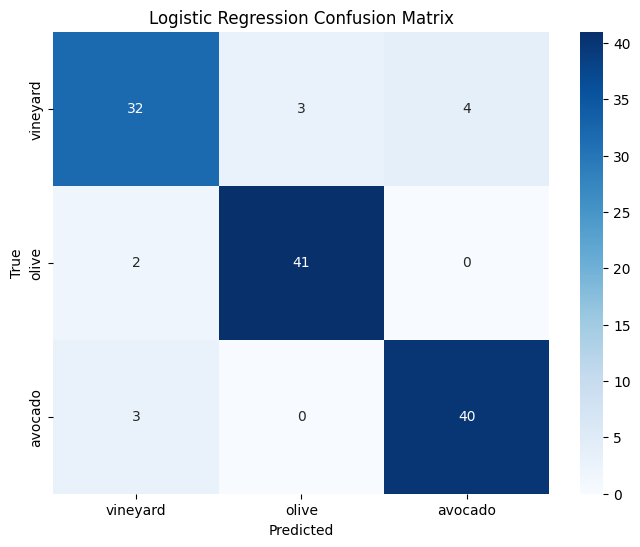

In [ ]:
# Loop through all models
for model_name, model in models.items():
    print(f"\nTraining and Evaluating {model_name}...")

    # Train the model
    model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    evaluation_results[model_name] = accuracy
    classification_reports[model_name] = classification_report(y_test, y_pred, output_dict=True)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)

    # Print evaluation metrics
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot the confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrices[model_name], annot=True, fmt='d', cmap='Blues',
                xticklabels=df['fruit_name'].unique(), yticklabels=df['fruit_name'].unique())
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


#### Rank Models Based on Performance
Sort the models based on their accuracy and print the ranking.

In [ ]:
# Rank models by accuracy
sorted_models = sorted(evaluation_results.items(), key=lambda x: x[1], reverse=True)
print("\nModel Rankings Based on Accuracy:")
for rank, (model_name, accuracy) in enumerate(sorted_models, start=1):
    print(f"{rank}. {model_name}: {accuracy:.2f}")



Model Rankings Based on Accuracy:
1. Random Forest: 0.94
2. Gradient Boosting: 0.93
3. Logistic Regression: 0.90
4. SVM: 0.80


#### Choose the Best Model
Based on the rankings, select the top-performing model and visualize its detailed classification report.


Best Model: Random Forest

Detailed Classification Report:
              precision    recall  f1-score  support
avocado        0.944444  0.871795  0.906667   39.000
olive          0.913043  0.976744  0.943820   43.000
vineyard       0.953488  0.953488  0.953488   43.000
accuracy       0.936000  0.936000  0.936000    0.936
macro avg      0.936992  0.934009  0.934658  125.000
weighted avg   0.936754  0.936000  0.935554  125.000


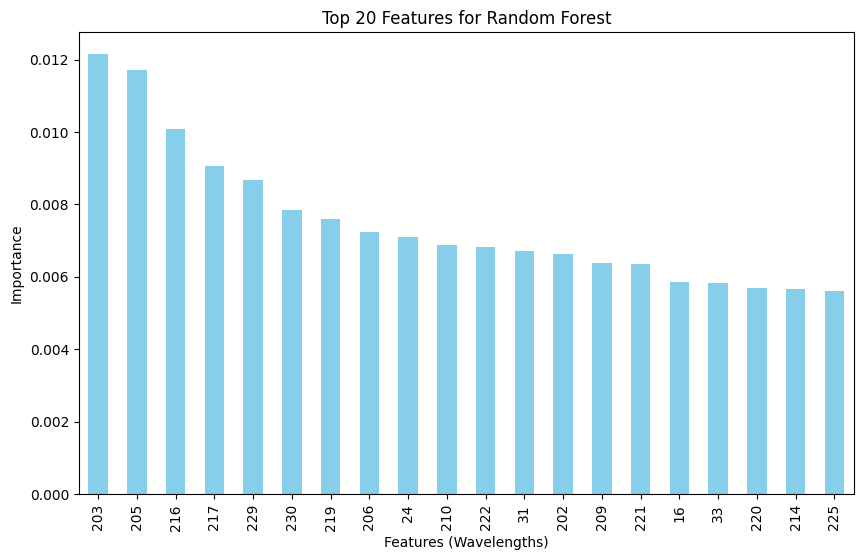

In [ ]:
# Select the best model (highest accuracy)
best_model_name = sorted_models[0][0]
best_model_report = classification_reports[best_model_name]

# Print detailed report for the best model
print(f"\nBest Model: {best_model_name}")
print("\nDetailed Classification Report:")
print(pd.DataFrame(best_model_report).transpose())

# Plot feature importance if available
if hasattr(models[best_model_name], "feature_importances_"):
    feature_importances = models[best_model_name].feature_importances_
    plt.figure(figsize=(10, 6))
    pd.Series(feature_importances, index=X.columns).nlargest(20).plot(kind='bar', color='skyblue')
    plt.title(f"Top 20 Features for {best_model_name}")
    plt.xlabel("Features (Wavelengths)")
    plt.ylabel("Importance")
    plt.show()


##  Learning Curve for the Best Model


Plotting Learning Curve for the Best Model: Random Forest...


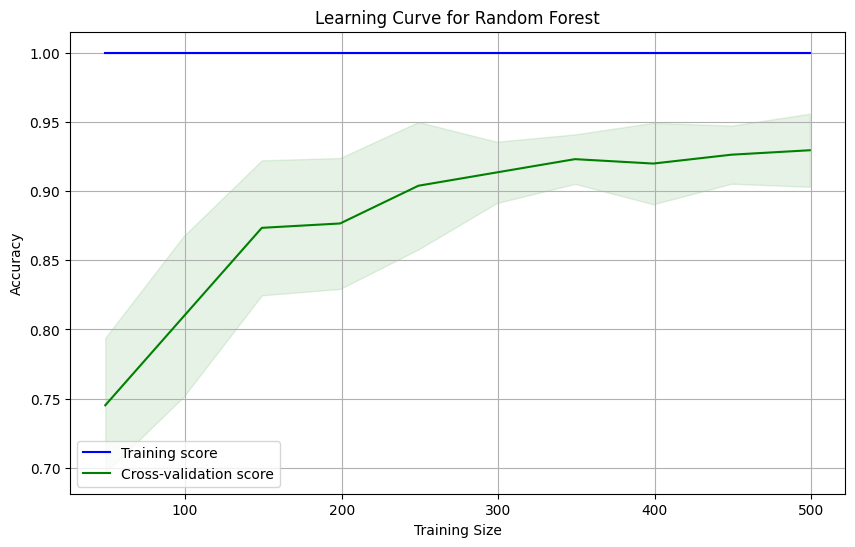

In [ ]:
from sklearn.model_selection import learning_curve
import numpy as np

# Step 10: Plot Learning Curve for the Best Model
print(f"\nPlotting Learning Curve for the Best Model: {best_model_name}...")

# Compute the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    models[best_model_name], X, y, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy', n_jobs=-1
)

# Calculate mean and std for plotting
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Training score", color="blue")
plt.plot(train_sizes, test_mean, label="Cross-validation score", color="green")

# Plot the fill between for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="blue")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="green")

# Add labels and title
plt.title(f"Learning Curve for {best_model_name}")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid(True)
plt.show()


### Model Evaluation on Test Set:


Best Model Test Accuracy: 0.94

Detailed Classification Report for Test Set:
              precision    recall  f1-score   support

     avocado       0.94      0.87      0.91        39
       olive       0.91      0.98      0.94        43
    vineyard       0.95      0.95      0.95        43

    accuracy                           0.94       125
   macro avg       0.94      0.93      0.93       125
weighted avg       0.94      0.94      0.94       125



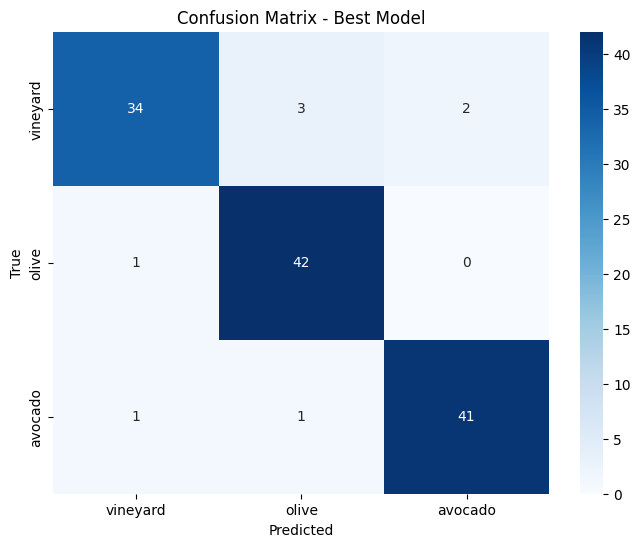

In [ ]:
# Make predictions on the test set using the best model
best_model=models[best_model_name]
y_pred_best = best_model.predict(X_test)

# Print classification report and accuracy
from sklearn.metrics import classification_report, accuracy_score
print(f"\nBest Model Test Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print("\nDetailed Classification Report for Test Set:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=df['fruit_name'].unique(), yticklabels=df['fruit_name'].unique())
plt.title("Confusion Matrix - Best Model")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


### Cross-Validation:

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation on the best model
cross_val_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')

# Print mean and standard deviation of the cross-validation scores
print(f"\nCross-Validation Accuracy: {cross_val_scores.mean():.2f} ± {cross_val_scores.std():.2f}")



Cross-Validation Accuracy: 0.93 ± 0.03


### Dump Model

In [ ]:
#Dump Final Model
import pickle
# Save the final model to a file
with open('plant_classification_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)


### Classify plants [max row numnber 624]

In [ ]:

import numpy as np
import pickle
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load the test dataset
df_test = pd.read_csv('spectral_data.csv')
test = df_test.iloc[:, 0:2151]

# Load the pre-trained model
with open('plant_classification_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)

# Initialize the scaler (same one used during training)
# scaler = StandardScaler()

# For simplicity, we fit it here to simulate the scaling process, but ideally, you should load the scaler as well.
scaled_test = scaler.fit_transform(test)

# Function to classify a plant based on a row number
def classify_plants(row_number=623):
    # Extract the data for the given row
    new_data = np.array([test.iloc[row_number]])
    # Scale the data using the same scaler used during training
    scaled_new_data = scaler.transform(new_data)  # Transforming to ensure the same scale

    # Predict the class for the new data
    prediction = loaded_model.predict(scaled_new_data)
    predicted_class=prediction[0]
    print(f"Predicted Class for row {row_number}: {predicted_class}")

# Example usage:
Row_Number = 400  # @param {type: "number"}
classify_plants(Row_Number)


Predicted Class for row 400: olive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
